<a href="https://colab.research.google.com/github/jaugusto/yolo-darknet-opencv/blob/main/object_detection(YOLO_and_opencv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Object detection using YOLO and OpenCV:**

In [20]:
!pip install opencv-python==4.4.0.40

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
path = '/content/gdrive/MyDrive/YOLO_exemplos/YOLO/modelo_YOLOv4.zip'

zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [24]:
labels_path = os.path.sep.join(['/content/cfg','coco.names'])
weights_path = os.path.sep.join(['/content','yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg','yolov4.cfg'])

In [25]:
LABELS = open(labels_path).read().strip().split('\n')

In [26]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')

In [27]:
net = cv2.dnn.readNet(config_path, weights_path)

In [28]:
ln = net.getLayerNames()

In [29]:
ln = [ln[int(i-1)] for i in net.getUnconnectedOutLayers()]

In [30]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(14,8)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [31]:
imagem = cv2.imread('/content/gdrive/MyDrive/YOLO_exemplos/YOLO/imagens/cachorros.jpg')
imagem_cp = imagem.copy()

(H, W) = imagem.shape[:2]

In [32]:
blob = cv2.dnn.blobFromImage(imagem, 1/255.0, (416, 416), swapRB = True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)


In [33]:
threshold = 0.5
threshold_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

In [34]:
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confianca = scores[classeID]

    if confianca > threshold:
      print('Scores: ' + str(scores))
      print('ClasseID: ' + str(classeID))
      print('Confianca: ' + str(confianca))

      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width/2))
      y = int(centerY - (height/2))

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)


Scores: [0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.605953 0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.      ]
ClasseID: 16
Confianca: 0.605953
Scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.9570455 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.     

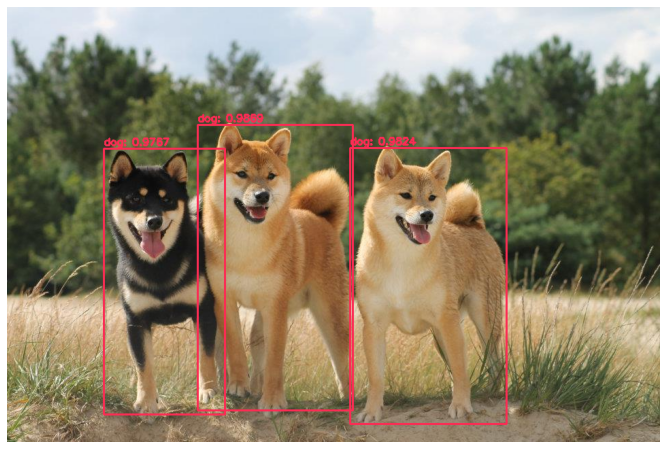

In [35]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

if len(objs) > 0:
  for i in objs.flatten():
    (x, y) = (caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])

    objeto = imagem_cp[y:y + h, x:x + w]
    #cv2_imshow(objeto)

    cor = [int(i) for i in COLORS[IDclasses[i]]]
    
    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)


mostrar(imagem)